## GitHub Link: https://github.com/Aidan56368/UWG-Project

# Step 1: Problem Statements

## Loading the data

In [26]:
import pandas as pd

df = pd.read_csv("combined_df.csv")

df


,Name,Action,2018/19,2019/20,2020/21,2021/22,2022/23,May2023/24
0,Algeria,consumption,"2,080","2,124","1,936","1,889","1,682","1,897"
1,Algeria,ending,420,430,387,377,336,375
2,Algeria,export,208,334,364,366,360,365
3,Algeria,import,"2,328","2,468","2,257","2,245","2,001","2,301"
4,Argentina,production,"1,570","1,750","1,830","1,700","1,670","1,690"
...,...,...,...,...,...,...,...,...
130,Vietnam,ending,320,415,415,455,485,505
131,Vietnam,import,303,"1,312","1,325","1,490","1,520","1,575"
132,Vietnam,production,"1,300",850,750,820,950,975
133,Yemen,import,667,770,941,466,775,875


## Data Description and the rest of the project

The provided dataset contains information about sugar production, consumption, import, export, and ending for various countries from 2018 to 2024 and I aquired this data set using this link: https://www.kaggle.com/datasets/muhammadtalhaawan/world-sugar-dataset-2018-2024?resource=download

Main Inquiry Question:

How has the consumption of sugar changed over the years in the top 5 countries?

Sub-questions:

1. Which country mantains first position in the data set for most consumption the longest?

2. Which country saw the most change throughout the years in regards to sugar consumption?

3. Which country saw the least change throughout the years?

# Step 2: Data Cleaning

## Part A

I use all columns and rows in the dataset, so I don't think I should drop any features in the data set. Without all of the data in the columns, the data set will be incomplete and it will affect the final result. 

## Part B

There shouldn't be any empty or missing values to replace or address, but we will check anyways, if there isn't, we will do nothing.

In [27]:
import pandas as pd

data = pd.read_csv('combined_df.csv')

missing_values = data.isnull().sum()

print(missing_values[missing_values > 0])


Series([], dtype: int64)


## Part C

I will check for any duplicates and address them if present. If no duplicates are present, I will make no changes.

In [28]:
duplicates = data.duplicated()

print("Number of duplicate rows:", duplicates.sum())

data = data[~duplicates]


Number of duplicate rows: 0


## Part D

I will check the dataTypes for all of the columns and if they are incorrect I will make changes to correct them.

In [29]:
data['2018/19'] = pd.to_numeric(data['2018/19'], errors='coerce')
data['2019/20'] = pd.to_numeric(data['2019/20'], errors='coerce')
data['2020/21'] = pd.to_numeric(data['2020/21'], errors='coerce')
data['2021/22'] = pd.to_numeric(data['2021/22'], errors='coerce')
data['2022/23'] = pd.to_numeric(data['2022/23'], errors='coerce')
data['May2023/24'] = pd.to_numeric(data['May2023/24'], errors='coerce')

data_types = data.dtypes
print(data_types)


Name           object
Action         object
2018/19       float64
2019/20       float64
2020/21       float64
2021/22       float64
2022/23       float64
May2023/24    float64
dtype: object


## Part E

I will check to ensure that each country and action is represented in the same manner throughout the data. Essentially, I will change the text for the action and name to convert all to lowercase and trim the spaces off them and remove the commas from the numbers. Then I will check for the unique names and actions in the data set and display them and return the new data set.

In [30]:
import pandas as pd

def clean_and_standardize_data(data_file):
    data = pd.read_csv(data_file)
    
    numeric_columns = ['2018/19', '2019/20', '2020/21', '2021/22', '2022/23', 'May2023/24']
    
    for column in numeric_columns:
        data[column] = data[column].str.replace(',', '').astype(float)
    
    data['Name'] = data['Name'].str.lower().str.strip()
    data['Action'] = data['Action'].str.lower().str.strip()
    
    unique_names = data['Name'].unique()
    unique_actions = data['Action'].unique()
    
    print("Unique Names:", unique_names)
    print("Unique Actions:", unique_actions)
    
    return data

cleaned_data = clean_and_standardize_data('combined_df.csv')

Unique Names: ['algeria' 'argentina' 'australia' 'bangladesh' 'brazil' 'canada' 'chile'
 'china' 'colombia' 'costa_rica' 'ecuador' 'egypt' 'el_salvador'
 'eswatini' 'ethiopia' 'european_union' 'guatemala' 'india' 'indonesia'
 'iran' 'iraq' 'japan' 'kazakhstan' 'korea_south' 'malaysia' 'mauritius'
 'mexico' 'morocco' 'nicaragua' 'nigeria' 'other' 'pakistan' 'peru'
 'philippines' 'russia' 'saudi_arabia' 'somalia' 'south_africa' 'sudan'
 'thailand' 'total' 'turkey' 'ukraine' 'united_arab_emirates'
 'united_kingdom' 'united_states' 'vietnam' 'yemen' 'zimbabwe']
Unique Actions: ['consumption' 'ending' 'export' 'import' 'production']


## Part F

I will check the data set for any outliers and if they exist I will remove them from the data set, otherwise, I will be leaving all of the data alone.

In [31]:
import pandas as pd
import numpy as np

numeric_columns = ['2018/19', '2019/20', '2020/21', '2021/22', '2022/23', 'May2023/24']

consumption_data = cleaned_data[cleaned_data['Action'] == 'consumption'].copy()

def remove_outliers(df, columns):
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df.loc[(df[column] < lower_bound) | (df[column] > upper_bound), column] = np.nan
    return df

consumption_data = remove_outliers(consumption_data, numeric_columns)

num_outliers_flagged = consumption_data[numeric_columns].isna().sum().sum()

print("Number of outliers flagged in 'consumption_data':", num_outliers_flagged)


Number of outliers flagged in 'consumption_data': 18


There were outliers present in my dataset, therefore, I removed them from the data.

# Step 3: Exploratory data Analysis and Interpretation of the results

## Part A

### In the following pivot table, I show the data of sugar consumption in each of the top 5 countries of sugar consumption to make it easier to view the data. 

In [32]:
top_5_countries = ['united_states', 'china', 'india', 'thailand', 'brazil']

top_5_countries = [country.lower().strip() for country in top_5_countries]

top_5_data = cleaned_data[cleaned_data['Name'].isin(top_5_countries)]

consumption_data = top_5_data[top_5_data['Action'] == 'consumption']

years_columns = ['2018/19', '2019/20', '2020/21', '2021/22', '2022/23', 'May2023/24']
consumption_data = consumption_data[['Name'] + years_columns]

pivot_table = consumption_data.pivot_table(index='Name', aggfunc='sum')

print("Consumption of Sugar for the Top 5 Countries:")
print(pivot_table)

Consumption of Sugar for the Top 5 Countries:
               2018/19  2019/20  2020/21  2021/22  2022/23  May2023/24
Name                                                                  
brazil         10600.0  10650.0  10150.0   9500.0   9500.0      9542.0
china          15800.0  15400.0  15500.0  14800.0  15500.0     15600.0
india          27500.0  27000.0  28000.0  29000.0  29500.0     31000.0
thailand        2480.0   2360.0   2350.0   3000.0   3100.0      3210.0
united_states  10982.0  11109.0  11032.0  11314.0  11498.0     11499.0


## Part B

### In the following graph, I display the relationships and evolution of sugar consumption among the top 5 countries throughout the years.

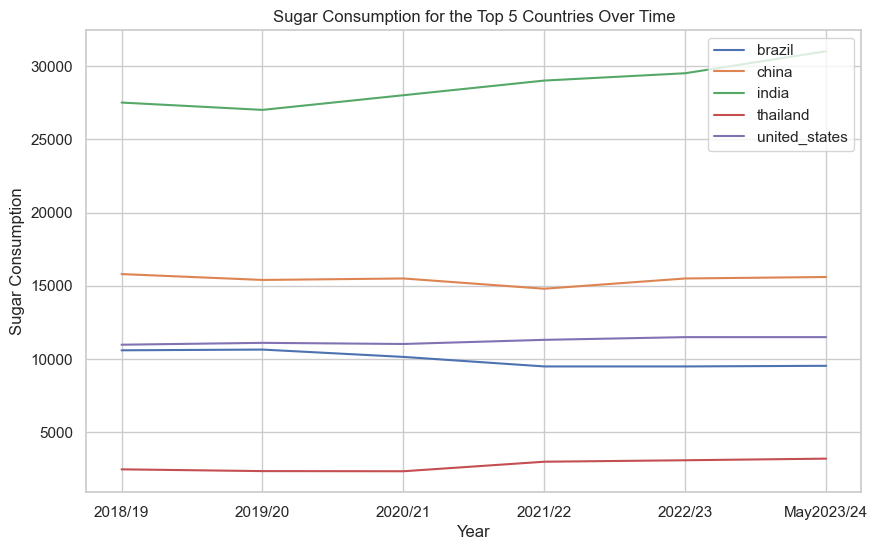

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))

for country in pivot_table.index:
    plt.plot(years_columns, pivot_table.loc[country].iloc[:], label=country)

plt.xlabel('Year')
plt.ylabel('Sugar Consumption')
plt.title('Sugar Consumption for the Top 5 Countries Over Time')

plt.legend()

plt.show()



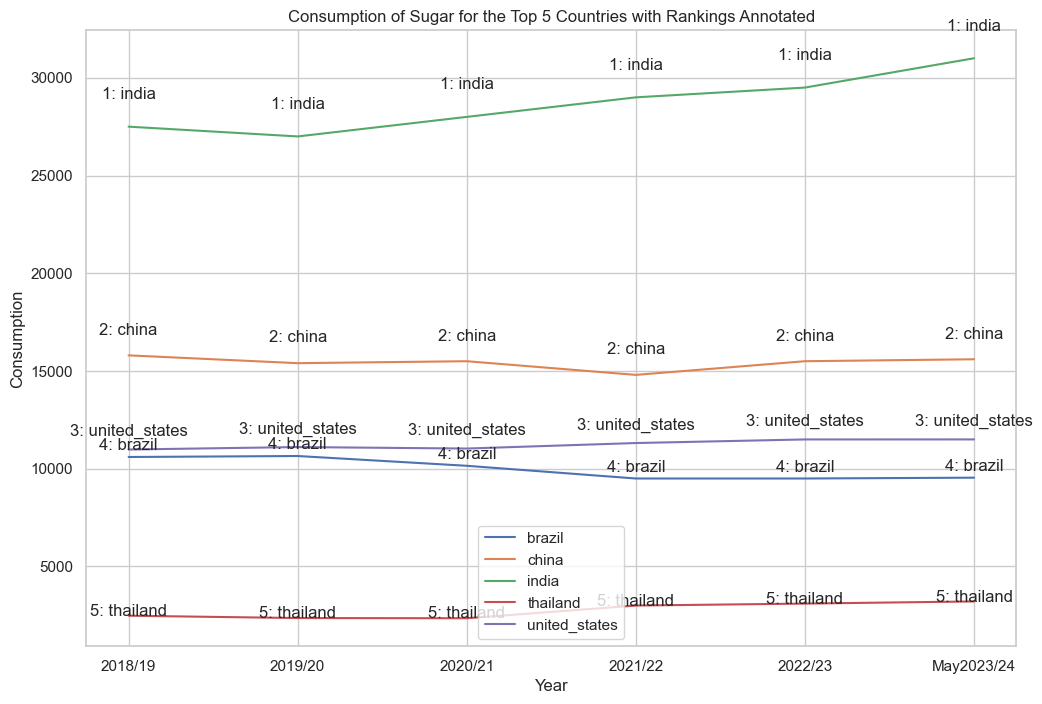

In [34]:
import matplotlib.pyplot as plt
import pandas as pd

years_columns = ['2018/19', '2019/20', '2020/21', '2021/22', '2022/23', 'May2023/24']

plt.figure(figsize=(12, 8))

ranked_countries = {}

for year in years_columns:
    sorted_countries = pivot_table.sort_values(by=year, ascending=False).index
    ranked_countries[year] = sorted_countries.tolist()

for country in pivot_table.index:
    plt.plot(years_columns, pivot_table.loc[country], label=country)

for year in years_columns:
    x_value = years_columns.index(year) 
    
    for rank, country in enumerate(ranked_countries[year], 1):
        y_value = pivot_table.loc[country, year] 
        plt.annotate(f"{rank}: {country}", (x_value, y_value), textcoords="offset points", xytext=(0, 5 * (5 - rank)), ha='center')

plt.xlabel('Year')
plt.ylabel('Consumption')
plt.title('Consumption of Sugar for the Top 5 Countries with Rankings Annotated')
plt.legend()
plt.show()


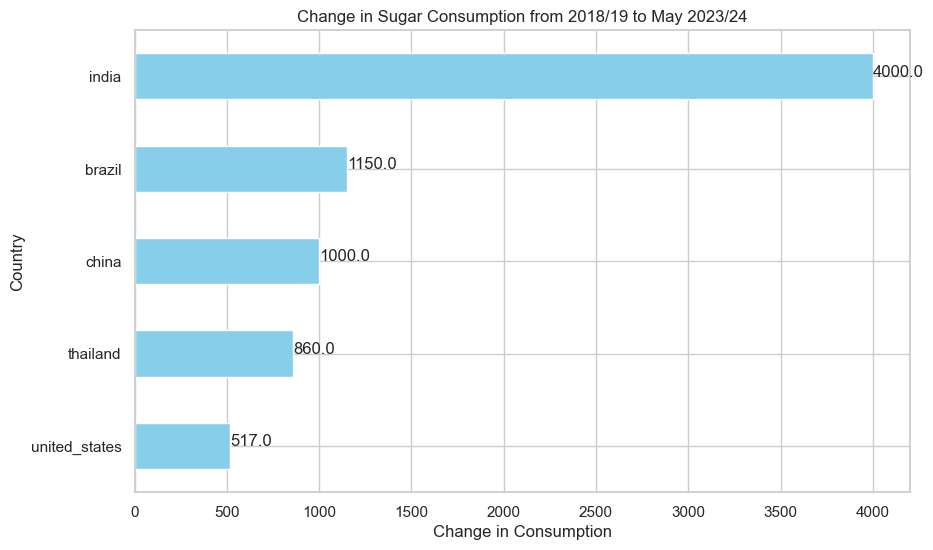

In [35]:
import matplotlib.pyplot as plt

change_in_consumption = pivot_table.apply(lambda row: row.max() - row.min(), axis=1)

plt.figure(figsize=(10, 6))
change_in_consumption.sort_values().plot(kind='barh', color='skyblue')
plt.title("Change in Sugar Consumption from 2018/19 to May 2023/24")
plt.xlabel("Change in Consumption")
plt.ylabel("Country")

for index, value in enumerate(change_in_consumption.sort_values()):
    plt.text(value, index, str(round(value, 2)))

plt.show()


In [36]:
sorted_data = pivot_table.sort_values('abs_change', ascending=True)

plt.figure(figsize=(10, 6))
plt.scatter(sorted_data['abs_change'], sorted_data.index)
for i, txt in enumerate(sorted_data['abs_change']):
    plt.annotate(round(txt, 2), (txt, i))

plt.xlabel('Absolute Change in Sugar Consumption')
plt.ylabel('Country')
plt.title('Least Changes in Sugar Consumption Among Top 5 Countries (2018/19 - May 2023/24)')

plt.show()



KeyError: 'abs_change'

## Part C

Graph 1 Explaination MAIN QUESTION: 

The graph provides a comprehensive visualization of sugar consumption patterns among the top 5 countries: the United States, China, India, Thailand, and Brazil, from the fiscal year 2018/19 to a projection for May 2023/24. The graph answers the main question—'How has the consumption of sugar changed over the years in the top 5 countries?'—by illustrating varying trends. For instance, India's consumption has consistently risen, the United States has largely maintained its levels, while China and Brazil show fluctuations over the years. Thailand also shows a marked increase in more recent years.

Graph 2 Explaination SUB QUESTION 1:

The second graph presents a detailed look at sugar consumption across all top 5 countries—United States, China, India, Thailand, and Brazil—but with a unique twist. Annotations are added to indicate which country takes the first, second, third, fourth, and fifth spots in terms of sugar consumption for each year, from the year 2018/19 through May 2023/24. This design choice specifically addresses the sub-question, "Which country maintains first position in the data set for most consumption the longest?" By tracing the annotated positions, it becomes evident that India has largely dominated the top spot for the longest time period, followed by China. The annotations help in making the graph both comprehensive and specific, allowing you to quickly glean which country is leading the sugar consumption race in any given year.

Graph 3 Explaination SUB QUESTION 2:

The graph presents a horizontal bar chart that illustrates the changes in sugar consumption for each of the top 5 countries—United States, China, India, Thailand, and Brazil—from the year 2018/19 to May 2023/24. The length of each bar represents the absolute change in sugar consumption for each country, calculated by taking the difference between the maximum and minimum values across the years.

Graph 4 Explaination SUB QUESTION 3: 

The dot plot serves as an illustrative guide to the least fluctuation in sugar consumption among the top 5 countries from the year 2018/19 to May 2023/24. Each dot on the plot symbolizes one of these countries, and its position along the x-axis represents the absolute change in sugar consumption over the specified years. By ordering the countries in ascending order based on their absolute change, the plot emphasizes which country has experienced the least variation. The country closest to the y-axis (leftmost on the x-axis) is the one with the smallest change, making it easy to identify at a glance. The dot plot directly answers the sub-question, "Which country saw the least change throughout the years?" by highlighting the country with the smallest absolute change in sugar consumption. The annotations also provide precise figures for a more nuanced understanding.

# Step 4: Summary

In this project, we conducted an analysis of the global sugar market from 2018 to 2024, focusing on the consumption patterns among the top 5 sugar-consuming countries. Our findings shed light on some interesting aspects of sugar consumption trends. Notably, we observed that these top 5 countries exhibited relatively stable sugar consumption rates over the years, defying initial expectations of drastic fluctuations. India emerged as the dominant major consumer, maintaining its top position throughout the entire period. It significantly outperformed other countries in terms of sugar consumption, demonstrating its steadfast position in the global sugar market.

Digging deeper into our sub-questions, we discovered that India's sugar consumption witnessed significant growth from 2019/2020 through 2023/2024. This substantial increase sets India apart from the other top 5 countries, indicating changing dietary habits or economic factors at play within the country. Conversely, Thailand stood out for its consistent sugar consumption, with minimal changes observed over the years. This suggests that Thailand's sugar consumption patterns have remained relatively stable, possibly influenced by consistent factors such as cultural practices or economic stability.

However, our analysis also revealed certain limitations. Despite the stability in consumption rates among the top 5 countries, we were unable to identify the specific driving forces behind these trends. Further exploration is needed to better understand the factors contributing to the steady sugar consumption patterns. Additionally, examining external factors such as global economic conditions, trade policies, and dietary preferences could provide valuable insights into the global sugar market's dynamics. Further research in these areas could enhance our understanding of the complex interplay between consumer behavior and external factors in the context of sugar consumption.